In [1]:
pip install git+https://github.com/siavash-saki/tesspy

  Cloning https://github.com/siavash-saki/tesspy to c:\users\hamann\appdata\local\temp\pip-req-build-jd92lezf
  Resolved https://github.com/siavash-saki/tesspy to commit cd9c0bae0ad77d23fc95d013e2c216112e44d312
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/siavash-saki/tesspy 'C:\Users\Hamann\AppData\Local\Temp\pip-req-build-jd92lezf'



  Created wheel for tesspy: filename=tesspy-0.0.1-py3-none-any.whl size=16774 sha256=9cb1e589e783d009f6a24a256bc0773705715f1f69a3371ba22f0a63fba73965
  Stored in directory: C:\Users\Hamann\AppData\Local\Temp\pip-ephem-wheel-cache-91k4a2d4\wheels\b9\79\0f\4b233c571556450a3d72324feb6d9b460d14e95ec897086443
Successfully built tesspy


In [2]:
from tesspy.tessellation import Tessellation
from tesspy.poi_data import RoadData, POIdata
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [3]:
city = Tessellation('Frankfurt am Main')

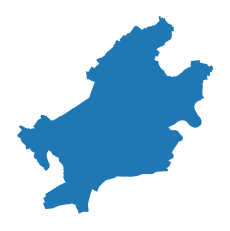

In [4]:
city_polygon = city.get_polygon()
city_polygon.plot().set_axis_off()

# Data Collection

In [6]:
city_POI = POIdata(city_polygon, ["amenity", "building"], 60, False).get_poi_data()

# only collecting buildung data
city_building = POIdata(city_polygon, ["building"], 60, False).get_poi_data()

# only collecting the cities' landuse, with verbose=True to get more information 
city_landuse = POIdata(city_polygon, ["landuse"], 60, False).get_poi_data()

city_road = RoadData(city_polygon, 
                     detail_deg=None, 
                     split_roads=True,
                     verbose=True).get_road_network()

# Tessellations

## Squares and Hexagons

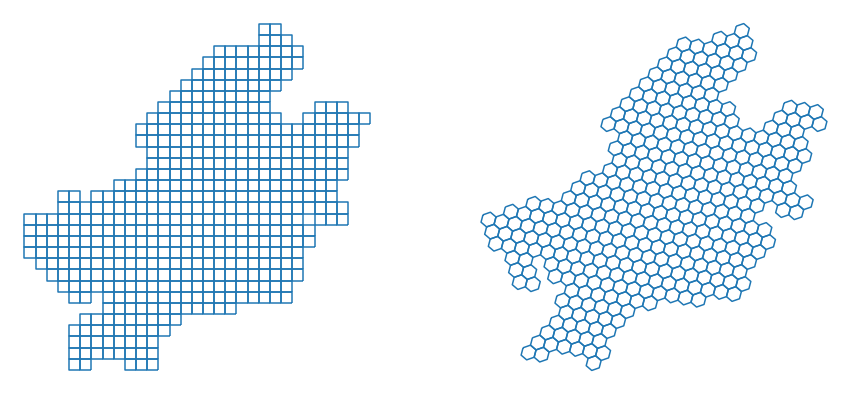

In [7]:
#user input is the resolution
city_sq = city.squares(15)

city_hex = city.hexagons(8)

fig,axes = plt.subplots(1,2, figsize=(15,10))

city_sq.boundary.plot(ax=axes[0])
axes[0].set_axis_off()

city_hex.boundary.plot(ax=axes[1])
axes[1].set_axis_off()

## Adaptive Squares

In [9]:
# Adaptive Squares using only building data
city_asq = city.adaptive_squares(start_resolution=14, 
                                 poi_categories=["building"], 
                                 threshold=None, 
                                 timeout=60, 
                                 verbose=False)

<AxesSubplot:>

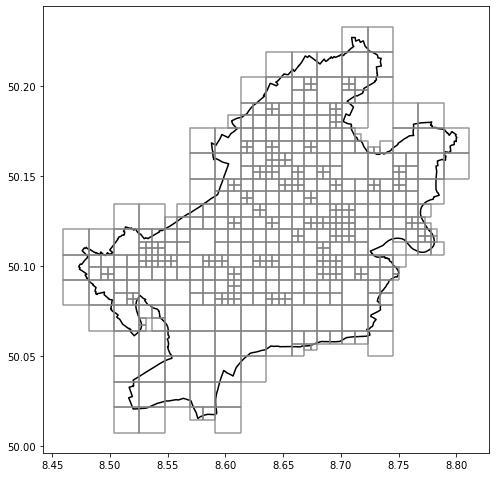

In [10]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_asq.boundary.plot(ax=ax, color="grey", alpha=0.8)

In [11]:
# Adaptive Squares using only building data
city_asq_2 = city.adaptive_squares(start_resolution=14, 
                                 poi_categories=["amenity","building"], 
                                 threshold=None, 
                                 timeout=60, 
                                 verbose=False)

<AxesSubplot:>

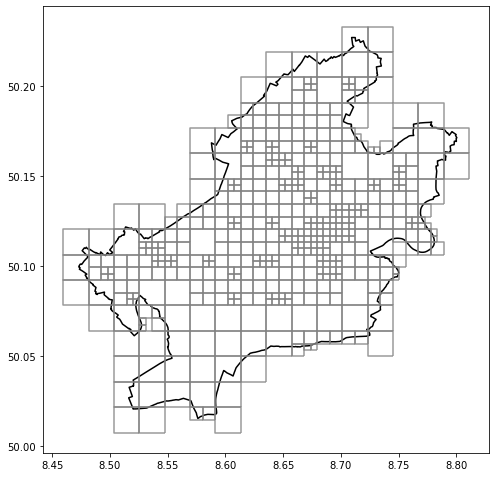

In [12]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_asq_2.boundary.plot(ax=ax, color="grey", alpha=0.8)

## Voronoi Polygons

In [13]:
city_kmeans = city.voronoi(cluster_algo="k-means",
                          poi_categories=["amenity"],
                          timeout=60,
                          n_polygons=len(city_sq),
                          verbose=False)

<AxesSubplot:>

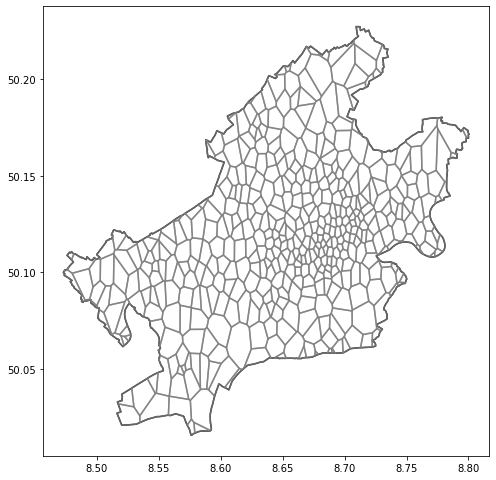

In [14]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_kmeans.boundary.plot(ax=ax, color="grey", alpha=0.8)

In [15]:
city_hdbscan = city.voronoi(cluster_algo="hdbscan",
                          poi_categories=["amenity"],
                          timeout=60,
                          n_polygons=len(city_sq),
                          verbose=False)

<AxesSubplot:>

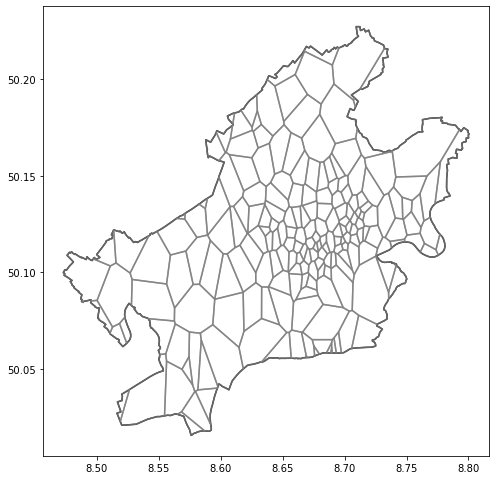

In [16]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_hdbscan.boundary.plot(ax=ax, color="grey", alpha=0.8)

## City Blocks

In [ ]:
city_cb = city.city_blocks(number_of_LGUs=2500,
                          detail_deg=None,
                          split_roads=True,
                          verbose=True)

Creating custom filter for all highway types
Created custom filter is ['highway'~'motorway|trunk|primary|secondary|tertiary|residential|unclassified|motorway_link|trunk_link|primary_link|secondary_link|living_street|pedestrian|track|bus_guideway|footway|path|service|cycleway']
Collection street network data
Splitting the linestring, such that each linestring has exactly 2 points.
Collected data has 272294 street segments
Road data is collected. Overall 272294 streets are included.
Creating initial city blocks using the road network data
Filtered out 6309 polygons, that where not in the area.
Threshold for hierarchical clustering is computed.
Distance threshold for clustering is 500.
Hierarchical Clustering in Progress with threshold 500.


In [ ]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_cb.boundary.plot(ax=ax, color="grey", alpha=0.8)